# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


In [2]:
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt',delim_whitespace = True)
X_train

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7347,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7348,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7349,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [3]:
X_train.columns = features


In [4]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7347,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7348,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7349,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## Obtain the  train data 

In [5]:
# get the data from txt files to pandas dataffame
# X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [6]:
train.shape

(7351, 564)

## Obtain the  test data 

In [7]:
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True)
X_test.columns = features
X_test


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2942,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2943,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2944,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [8]:
# get the data from txt files to pandas dataffame
# X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2942,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2943,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2944,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [9]:
test.shape

(2946, 564)

# Data Cleaning

## 1. Check for Duplicates

In [10]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [11]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

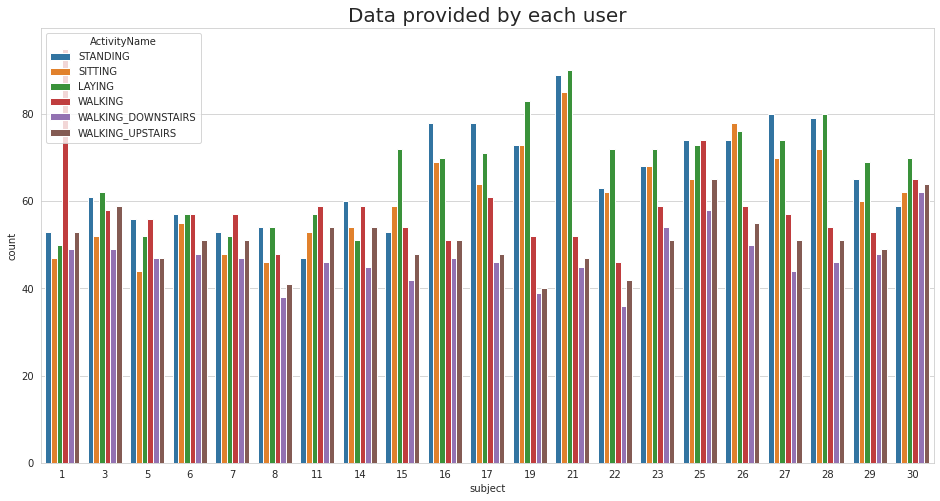

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

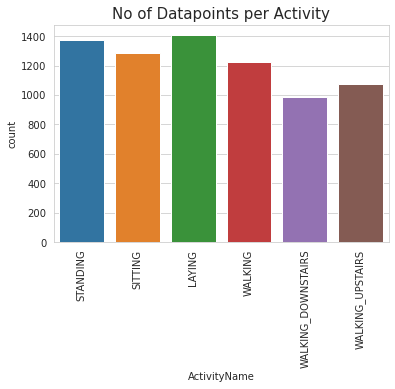

In [14]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [15]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [16]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

D:\New folder (2)\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


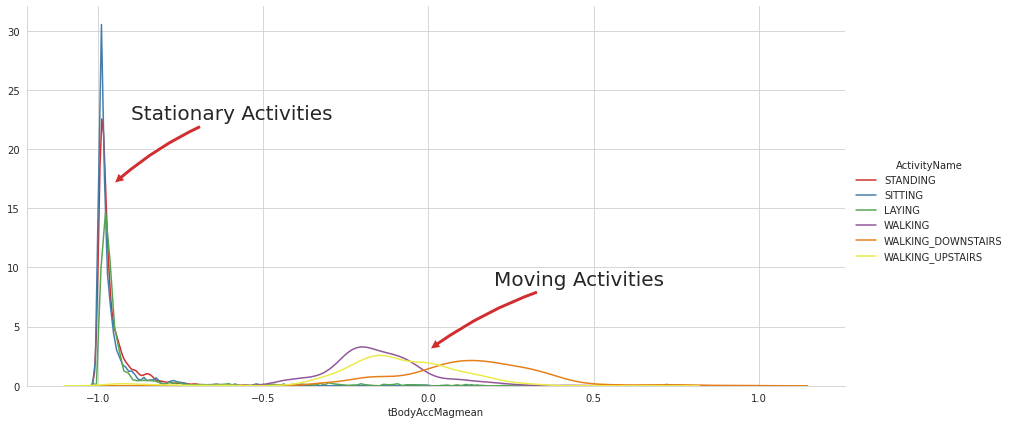

In [17]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

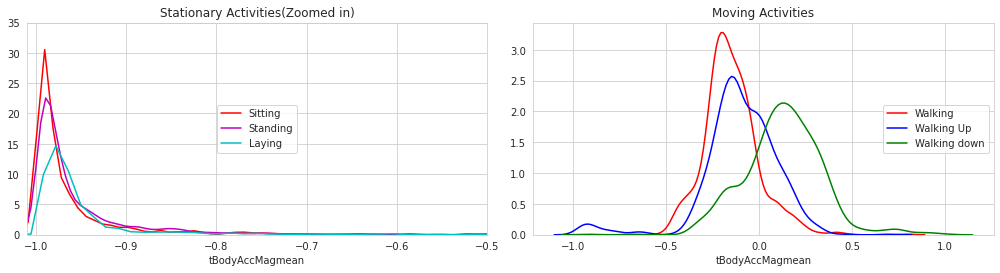

In [18]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

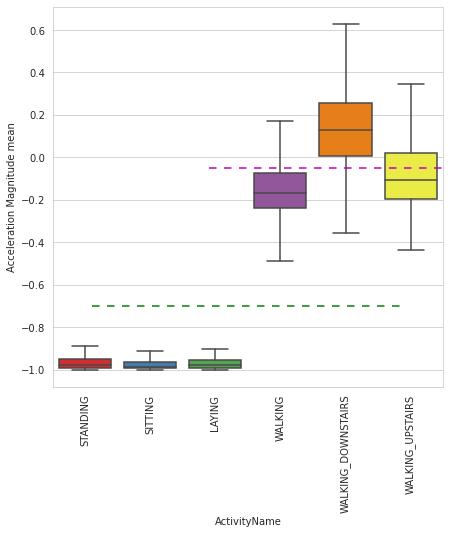

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

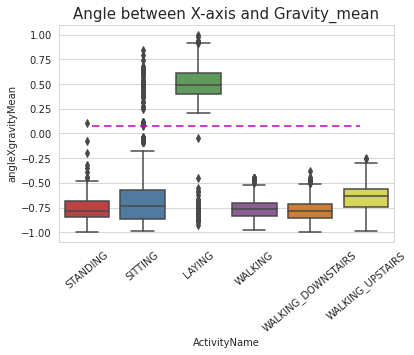

In [20]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

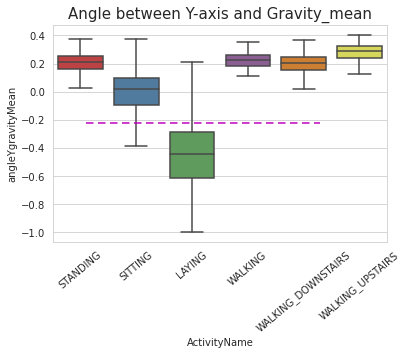

In [21]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7351 samples in 1.147s...
[t-SNE] Computed neighbors for 7351 samples in 41.728s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.635865
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 124.6604996, gradient norm = 0.0287875 (50 iterations in 4.451s)
[t-SNE] Iteration 100: error = 107.0444031, gradient norm = 0.0273447 (50 iterations in

D:\New folder (2)\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


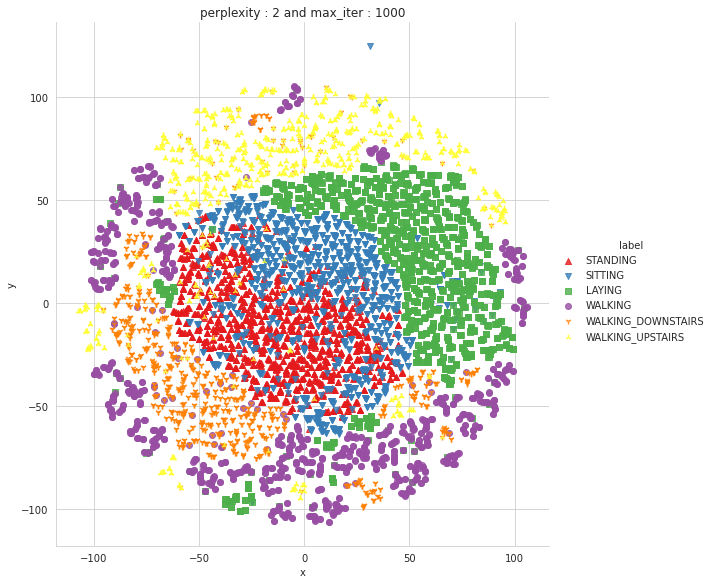

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 1.129s...
[t-SNE] Computed neighbors for 7351 samples in 34.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.961241
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 114.1220779, gradient norm = 0.0195714 (50 iterations in 2.653s)
[t-SNE] Iteration 100: error = 97.6474533, gradient norm = 0.0148544 (50 iteratio

D:\New folder (2)\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


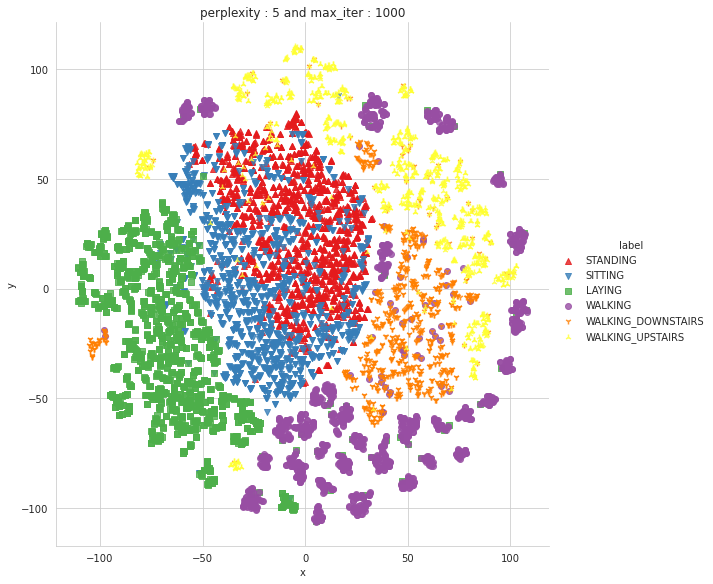

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 1.156s...
[t-SNE] Computed neighbors for 7351 samples in 35.419s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133804
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 105.6871643, gradient norm = 0.0199660 (50 iterations in 2.602s)
[t-SNE] Iteration 100: error = 90.2643204, gradient norm = 0.0110738 (50 iterati

D:\New folder (2)\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


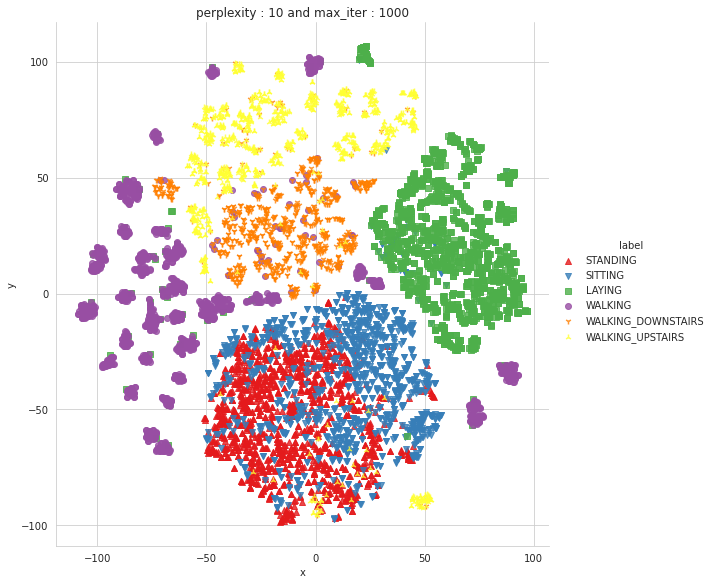

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7351 samples in 1.141s...
[t-SNE] Computed neighbors for 7351 samples in 37.278s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.274317
[t-SNE] Computed conditional probabilities in 0.230s
[t-SNE] Iteration 50: error = 95.6839523, gradient norm = 0.0311351 (50 iterations in 3.198s)
[t-SNE] Iteration 100: error = 84.1290665, gradient norm = 0.0063428 (50 iteratio

D:\New folder (2)\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


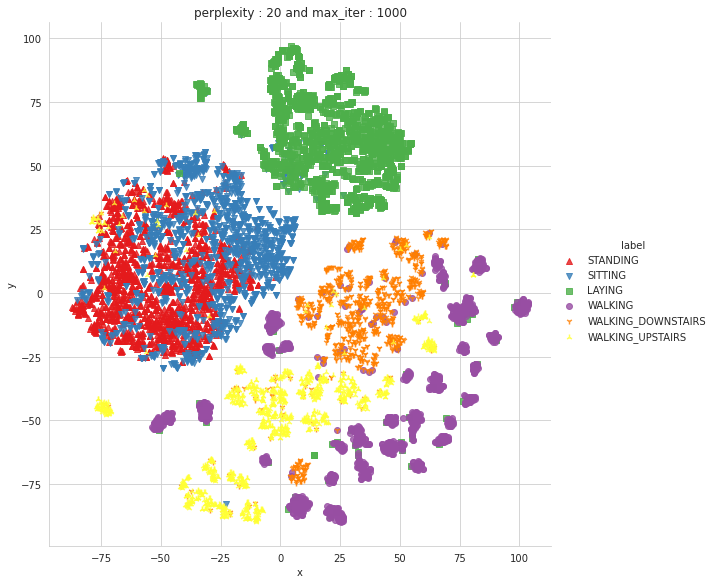

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7351 samples in 1.721s...
[t-SNE] Computed neighbors for 7351 samples in 43.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.437668
[t-SNE] Computed conditional probabilities in 0.648s
[t-SNE] Iteration 50: error = 85.6335602, gradient norm = 0.0300800 (50 iterations in 5.120s)
[t-SNE] Iteration 100: error = 75.6208267, gradient norm = 0.0038967 (50 iterati

D:\New folder (2)\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


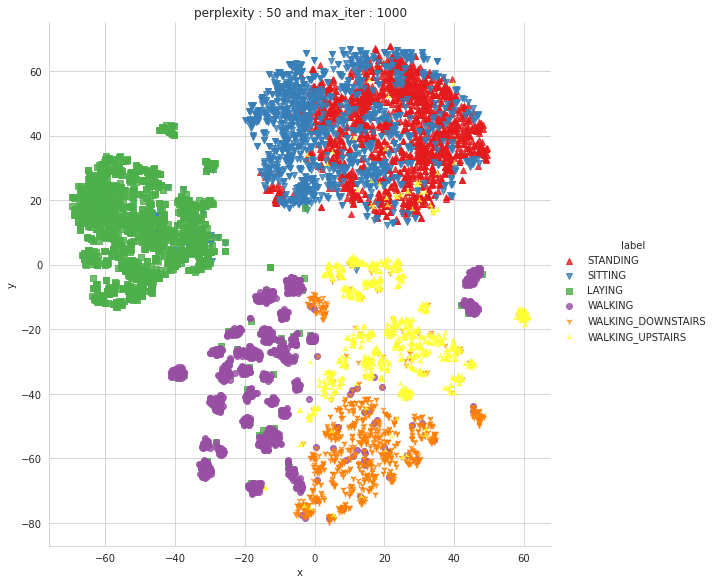

Done


In [24]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Machine Learning Models

In [25]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7351, 564) (2946, 564)


In [26]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING


In [27]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [28]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [29]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7351, 561),(7351,))
X_test  and y_test  : ((2946, 561),(2946,))


# Labels that are useful for Confusion Matrix

In [30]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Function to plot the confusion matrix¶

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generic function to run any model specified¶

In [32]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

In [33]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

In [34]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   21.4s finished
D:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:24.156000


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.026861


---------------------
|      Accuracy      |
---------------------

    0.9107264086897489


--------------------
| Confusion Matrix |
--------------------

 [[519   0   0  18   0   0]
 [ 14 416  59   0   0   2]
 [  0  34 491   2   0   5]
 [  0   0   0 476  15   5]
 [  0   0   2  29 355  34]
 [  0   1   9  19  15 426]]


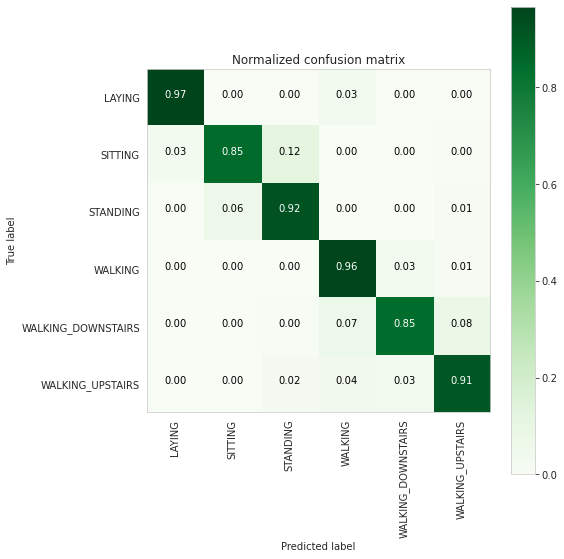

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.97      0.97      0.97       537
           SITTING       0.92      0.85      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.92      0.85      0.88       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       470

          accuracy                           0.91      2946
         macro avg       0.91      0.91      0.91      2946
      weighted avg       0.91      0.91      0.91      2946



In [35]:
#start grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


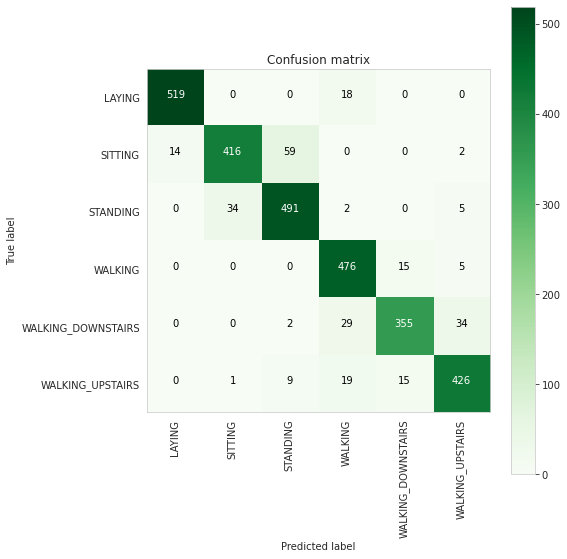

In [36]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [37]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8983807803006963



# 2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished
D:\New folder (2)\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:03:38.604464


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012009


---------------------
|      Accuracy      |
---------------------

    0.9209097080787508


--------------------
| Confusion Matrix |
--------------------

 [[509   0  10  18   0   0]
 [ 10 421  54   0   0   6]
 [  0  24 501   1   0   6]
 [  1   1   0 476  13   5]
 [  0   1   2  19 372  26]
 [  0   5   9   9  13 434]]


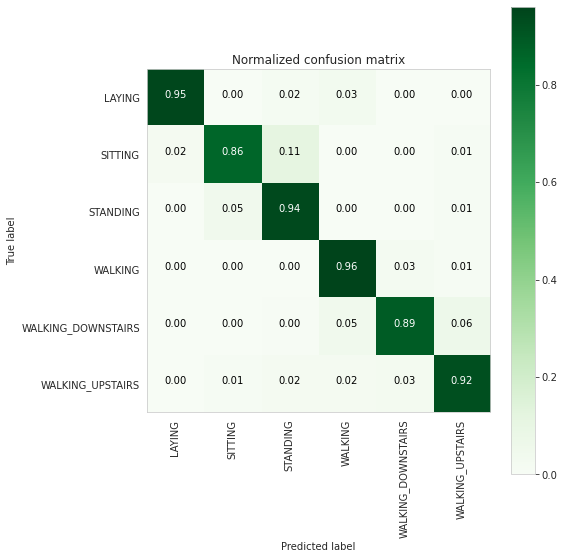

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.98      0.95      0.96       537
           SITTING       0.93      0.86      0.89       491
          STANDING       0.87      0.94      0.90       532
           WALKING       0.91      0.96      0.93       496
WALKING_DOWNSTAIRS       0.93      0.89      0.91       420
  WALKING_UPSTAIRS       0.91      0.92      0.92       470

          accuracy                           0.92      2946
         macro avg       0.92      0.92      0.92      2946
      weighted avg       0.92      0.92      0.92      2946



In [38]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [39]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9054581778326558



# 3. Kernel SVM with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:08:10.362015


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.650321


---------------------
|      Accuracy      |
---------------------

    0.9276985743380856


--------------------
| Confusion Matrix |
--------------------

 [[518   1   0  18   0   0]
 [ 14 425  51   0   0   1]
 [  0  18 508   0   0   6]
 [  0   0   0 476  15   5]
 [  0   0   2  10 371  37]
 [  3   0   6  20   6 435]]


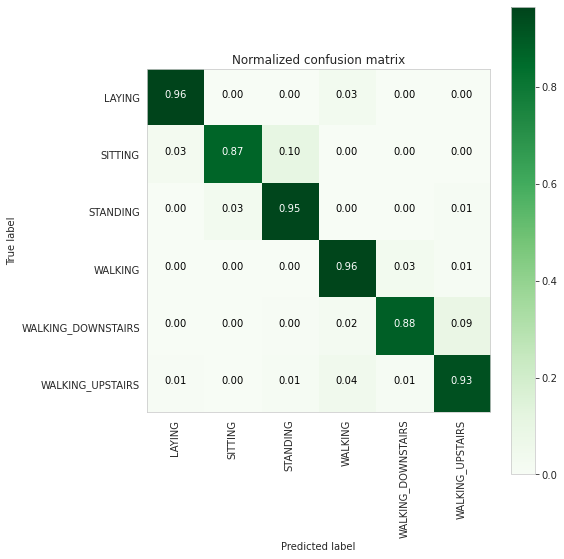

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.97      0.96      0.97       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.90      0.95      0.92       532
           WALKING       0.91      0.96      0.93       496
WALKING_DOWNSTAIRS       0.95      0.88      0.91       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       470

          accuracy                           0.93      2946
         macro avg       0.93      0.93      0.93      2946
      weighted avg       0.93      0.93      0.93      2946



In [40]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [41]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9015132470391285



# 4. Decision Tree with GridsearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:21.443405


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012028


---------------------
|      Accuracy      |
---------------------

    0.840122199592668


--------------------
| Confusion Matrix |
--------------------

 [[517   5   0  12   3   0]
 [ 10 375 106   0   0   0]
 [  0  63 469   0   0   0]
 [ 10   0   0 442  33  11]
 [  4   0   2  52 308  54]
 [ 10   0  11  58  27 364]]


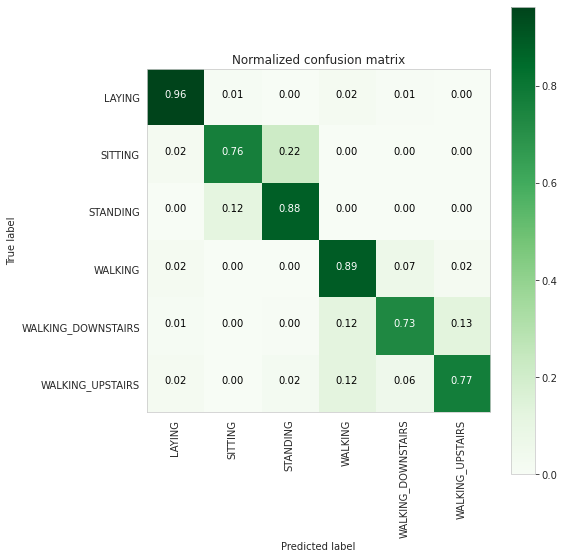

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.94      0.96      0.95       537
           SITTING       0.85      0.76      0.80       491
          STANDING       0.80      0.88      0.84       532
           WALKING       0.78      0.89      0.83       496
WALKING_DOWNSTAIRS       0.83      0.73      0.78       420
  WALKING_UPSTAIRS       0.85      0.77      0.81       470

          accuracy                           0.84      2946
         macro avg       0.84      0.83      0.84      2946
      weighted avg       0.84      0.84      0.84      2946

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=7)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets

In [42]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Search Classifier with GridsearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:15:13.509998


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.110077


---------------------
|      Accuracy      |
---------------------

    0.8947725729803123


--------------------
| Confusion Matrix |
--------------------

 [[519   0   0  17   1   0]
 [ 13 418  59   0   0   1]
 [  0  49 481   0   0   2]
 [  0   0   0 465  22   9]
 [  0   0   2  25 332  61]
 [  0   0   9  30  10 421]]


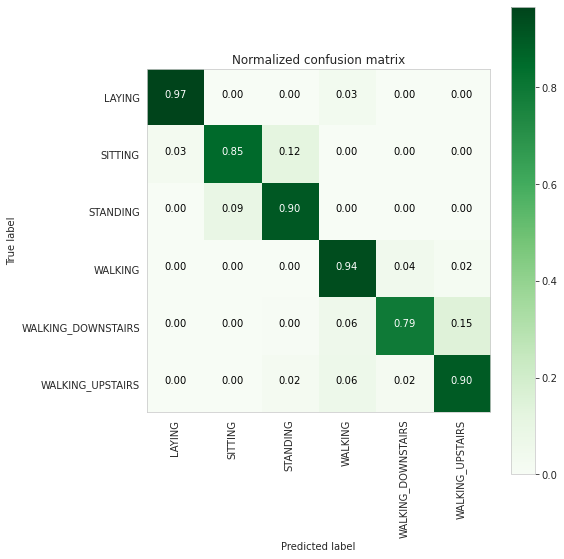

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.98      0.97      0.97       537
           SITTING       0.90      0.85      0.87       491
          STANDING       0.87      0.90      0.89       532
           WALKING       0.87      0.94      0.90       496
WALKING_DOWNSTAIRS       0.91      0.79      0.85       420
  WALKING_UPSTAIRS       0.85      0.90      0.87       470

          accuracy                           0.89      2946
         macro avg       0.90      0.89      0.89      2946
      weighted avg       0.90      0.89      0.89      2946

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=11, n_estimators=170)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 11, 'n_estimators': 170}

-----------------------

In [43]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# Comparing all the models

In [46]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 91.07%       8.927%
Linear SVC          : 92.09%       7.909% 
rbf SVM classifier  : 92.77%      7.23% 
DecisionTree        : 84.01%      15.99% 
Random Forest       : 89.48%      10.52% 


# From the above algorithms Linear SVC and Rbf SVM Classifier are giving the good accuracy.